In [159]:
import pandas as pd             
import matplotlib.pyplot as plt  
import datetime as dt           
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import math
import os                       
import requests, io              
import zipfile as zf             
import shutil                   
import statsmodels.formula.api as smf
import matplotlib.ticker as mtick
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression as linreg
from scipy.stats import kde
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

%matplotlib inline

In [2]:
path_world_covid = '/Users/jarrodhoran/Downloads/COVID-19-geographic-disbtribution-worldwide.csv'
world_covid = pd.read_csv(path_world_covid)
world_covid['dateRep'] = pd.to_datetime(world_covid['dateRep'])
world_covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-10-27,27,10,2020,199,8,Afghanistan,AF,AFG,38041757.0,Asia,2.902074
1,2020-10-26,26,10,2020,65,3,Afghanistan,AF,AFG,38041757.0,Asia,2.718066
2,2020-10-25,25,10,2020,81,4,Afghanistan,AF,AFG,38041757.0,Asia,2.799555
3,2020-10-24,24,10,2020,61,2,Afghanistan,AF,AFG,38041757.0,Asia,2.586631
4,2020-10-23,23,10,2020,116,4,Afghanistan,AF,AFG,38041757.0,Asia,2.452568
...,...,...,...,...,...,...,...,...,...,...,...,...
51678,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
51679,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
51680,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
51681,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [3]:
world_covid['geoId'].nunique()
world_covid['countriesAndTerritories'].nunique()

212

In [4]:
#drop the countries that aren't in world COVID
path_country_coordinate = '/Users/jarrodhoran/Downloads/countries.csv'
country_coord = pd.read_csv(path_country_coordinate)
#country_coord

In [5]:
path_us_counties = '/Users/jarrodhoran/Downloads/us-counties.csv'
us_counties = pd.read_csv(path_us_counties)
us_counties['date'] = pd.to_datetime(us_counties['date'])
#us_counties

In [6]:
path_netflix = '/Users/jarrodhoran/Downloads/Netflix.csv'
netflix = pd.read_csv(path_netflix).tail(365)
netflix['Date'] = pd.to_datetime(netflix['Date'])
netflix = netflix[netflix['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
#pd.set_option('display.max_rows', None)
#netflix

In [7]:
path_amazon = '/Users/jarrodhoran/Downloads/Amazon.csv'
amazon = pd.read_csv(path_amazon).tail(365)
amazon['Date'] = pd.to_datetime(amazon['Date'])
amazon = amazon[amazon['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
#amazon

In [8]:
path_google = '/Users/jarrodhoran/Downloads/Google.csv'
google = pd.read_csv(path_google).tail(365)
google['Date'] = pd.to_datetime(google['Date'])
google = google[google['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
#google

In [9]:
path_apple = '/Users/jarrodhoran/Downloads/Apple.csv'
apple = pd.read_csv(path_apple).tail(365)
apple['Date'] = pd.to_datetime(apple['Date'])
apple = apple[apple['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
#apple

In [10]:
path_facebook = '/Users/jarrodhoran/Downloads/Facebook.csv'
facebook = pd.read_csv(path_facebook).tail(365)
facebook = facebook
facebook['Date'] = pd.to_datetime(facebook['Date'])
facebook = facebook[facebook['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
#facebook

In [11]:
path_usd_adv_econ = '/Users/jarrodhoran/Downloads/DTWEXAFEGS.csv'
usd_adv_econ = pd.read_csv(path_usd_adv_econ)
usd_adv_econ['DATE'] = pd.to_datetime(usd_adv_econ['DATE'])
usd_adv_econ = usd_adv_econ[usd_adv_econ['DATE'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
#usd_adv_econ

In [12]:
path_usd_em_econ = '/Users/jarrodhoran/Downloads/DTWEXEMEGS.csv'
usd_em_econ = pd.read_csv(path_usd_em_econ)
usd_em_econ['DATE'] = pd.to_datetime(usd_em_econ['DATE'])
usd_em_econ = usd_em_econ[usd_em_econ['DATE'].dt.year == 2020]
#usd_em_econ

In [13]:
path_usd_rmb = '/Users/jarrodhoran/Downloads/DEXCHUS.csv'
usd_rmb = pd.read_csv(path_usd_rmb)
usd_rmb['DATE'] = pd.to_datetime(usd_rmb['DATE'])
usd_rmb = usd_rmb[usd_rmb['DATE'].dt.year == 2020]
#usd_rmb

# World Covid per Month and FAANGs

In [14]:
# merge stocks
netflix2 = netflix.drop(columns = ['Open','High','Low','Adj Close','Volume'])
netflix2 = netflix2.rename(columns={"Close": "Close_Netflix"})
google2 = google.drop(columns = ['Open','High','Low','Adj Close','Volume'])
google2 = google2.rename(columns={"Close": "Close_Google"})
amazon2 = amazon.drop(columns = ['Open','High','Low','Adj Close','Volume'])
amazon2 = amazon2.rename(columns={"Close": "Close_Amazon"})
apple2 = apple.drop(columns = ['Open','High','Low','Adj Close','Volume'])
apple2 = apple2.rename(columns={"Close": "Close_Apple"})
facebook2 = facebook.drop(columns = ['Open','High','Low','Adj Close','Volume'])
facebook2 = facebook2.rename(columns={"Close": "Close_FB"})

faangs = facebook2.merge(apple2, on = 'Date', how = 'left')
faangs = faangs.merge(amazon2, on = 'Date', how = 'left')
faangs = faangs.merge(google2, on = 'Date', how = 'left')
faangs = faangs.merge(netflix2, on = 'Date', how = 'left')
faangs['Date'] = faangs['Date'].dt.strftime('%Y-%m-%d')


faangs.drop([147,148,149,150,151,152,153,154,155,156,157,158], inplace = True)
#faangs

In [15]:
faangs['Month'] = faangs.Date.str[6:7]

#April

faangs_april = faangs.loc[faangs['Month'] == '4']

faangs_april['Day_Close'] = (faangs_april['Close_FB'] + faangs_april['Close_Apple'] + 
                             faangs_april['Close_Amazon'] + faangs_april['Close_Google'] + 
                             faangs_april['Close_Netflix'])

faangs_april['Date'] = pd.to_datetime(faangs_april['Date'])

f4_piv = faangs_april.pivot_table(index = 'Date',columns = 'Month',values = 'Day_Close', aggfunc = 'sum')
f4_piv = f4_piv.pct_change()
f4_piv

#May

faangs_may = faangs.loc[faangs['Month'] == '5']

faangs_may['Day_Close'] = (faangs_may['Close_FB'] + faangs_may['Close_Apple'] + 
                           faangs_may['Close_Amazon'] + faangs_may['Close_Google'] + 
                           faangs_may['Close_Netflix'])

faangs_may['Date'] = pd.to_datetime(faangs_may['Date'])

f5_piv = faangs_may.pivot_table(index = 'Date',columns = 'Month',values = 'Day_Close', aggfunc = 'sum')
f5_piv = f5_piv.pct_change()
#f5_piv

#June

faangs_june = faangs.loc[faangs['Month'] == '6']

faangs_june['Day_Close'] = (faangs_june['Close_FB'] + faangs_june['Close_Apple'] + 
                           faangs_june['Close_Amazon'] + faangs_june['Close_Google'] + 
                           faangs_june['Close_Netflix'])

faangs_june['Date'] = pd.to_datetime(faangs_june['Date'])

f6_piv = faangs_june.pivot_table(index = 'Date',columns = 'Month',values = 'Day_Close', aggfunc = 'sum')
f6_piv = f6_piv.pct_change()
#f6_piv

#July

faangs_july = faangs.loc[faangs['Month'] == '7']

faangs_july['Day_Close'] = (faangs_july['Close_FB'] + faangs_july['Close_Apple'] + 
                           faangs_july['Close_Amazon'] + faangs_july['Close_Google'] + 
                           faangs_july['Close_Netflix'])

faangs_july['Date'] = pd.to_datetime(faangs_july['Date'])

f7_piv = faangs_july.pivot_table(index = 'Date',columns = 'Month',values = 'Day_Close', aggfunc = 'sum')
f7_piv = f7_piv.pct_change()
#f7_piv

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [16]:
#f6_piv = f6_piv.reset_index()
#f6_piv.dtypes
#f6_piv.ix[index.to_datetime()]
f6_piv.index

DatetimeIndex(['2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
               '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22',
               '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [17]:
#fig, ax = plt.subplots()
#ax.axhline(june_mean, color = 'red',linestyle = 'dashed')
#f6_piv.plot.line(ax = ax,x = 'Date', y = '6')

In [114]:
country_coord = country_coord.rename(columns={"country": "geoId"})
#country_coord

In [116]:
covid_location = world_covid.merge(country_coord, on = 'geoId', how = 'left', indicator = True)
covid_location = covid_location[covid_location['_merge']=='both']

covid_location = covid_location.drop(columns = ['day','year',
                               'popData2019','name','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])

covid_location = covid_location.rename(columns={"dateRep": "Date","continentExp":"Continent",
                                                "countriesAndTerritories":"Country","latitude":"Latitude",
                                               "longitude":"Longitude","cases":"New Cases",
                                               'deaths':"Deaths"})

covid_location['month'] = covid_location['month'].astype(str)
covid_location = covid_location.loc[(covid_location['month'].str.contains('4|5|6|7|8') == True),:]

covid_location = covid_location.groupby(['month','Date','Country',
                                         'Continent','Latitude','Longitude','countryterritoryCode'], as_index = False)[['New Cases', 'Deaths']].sum()
covid_location.loc[covid_location['Country'] == 'Afghanistan',:]
covid_location['month'] = covid_location['month'].astype(int)

covid_april = covid_location.loc[covid_location['month'] == 4]
covid_april = covid_april.groupby(['Country','Latitude','Longitude','Continent','month','countryterritoryCode'], as_index = False)[['New Cases', 'Deaths']].sum()

covid_may = covid_location.loc[covid_location['month'] == 5]
covid_may = covid_may.groupby(['Country','Latitude','Longitude','Continent','month','countryterritoryCode'], as_index = False)[['New Cases', 'Deaths']].sum()

covid_june = covid_location.loc[covid_location['month'] == 6]
covid_june = covid_june.groupby(['Country','Latitude','Longitude','Continent','month','countryterritoryCode'], as_index = False)[['New Cases', 'Deaths']].sum()

covid_july = covid_location.loc[covid_location['month'] == 7]
covid_july = covid_july.groupby(['Country','Latitude','Longitude','Continent','month','countryterritoryCode'], as_index = False)[['New Cases', 'Deaths']].sum()

In [117]:
covid_july

,Country,Latitude,Longitude,Continent,month,countryterritoryCode,New Cases,Deaths
0,Afghanistan,33.939110,67.709953,Asia,7,AFG,5304,538
1,Albania,41.153332,20.168331,Europe,7,ALB,2731,96
2,Algeria,28.033886,1.659626,Africa,7,DZA,16260,295
3,Andorra,42.546245,1.601554,Europe,7,AND,67,0
4,Angola,-11.202692,17.873887,Africa,7,AGO,802,37
...,...,...,...,...,...,...,...,...
198,Vietnam,14.058324,108.277199,Asia,7,VNM,154,0
199,Western_Sahara,24.215527,-12.885834,Africa,7,ESH,558,0
200,Yemen,15.552727,48.516388,Asia,7,YEM,598,183
201,Zambia,-13.133897,27.849332,Africa,7,ZMB,3987,127


In [108]:
world_covid = world_covid.rename(columns={"dateRep": "Date"})

In [109]:
cmap = mpl.cm.RdYlGn
reversed_cmap = cmap.reversed()
n = mpl.colors.Normalize()
plt.style.use('dark_background')

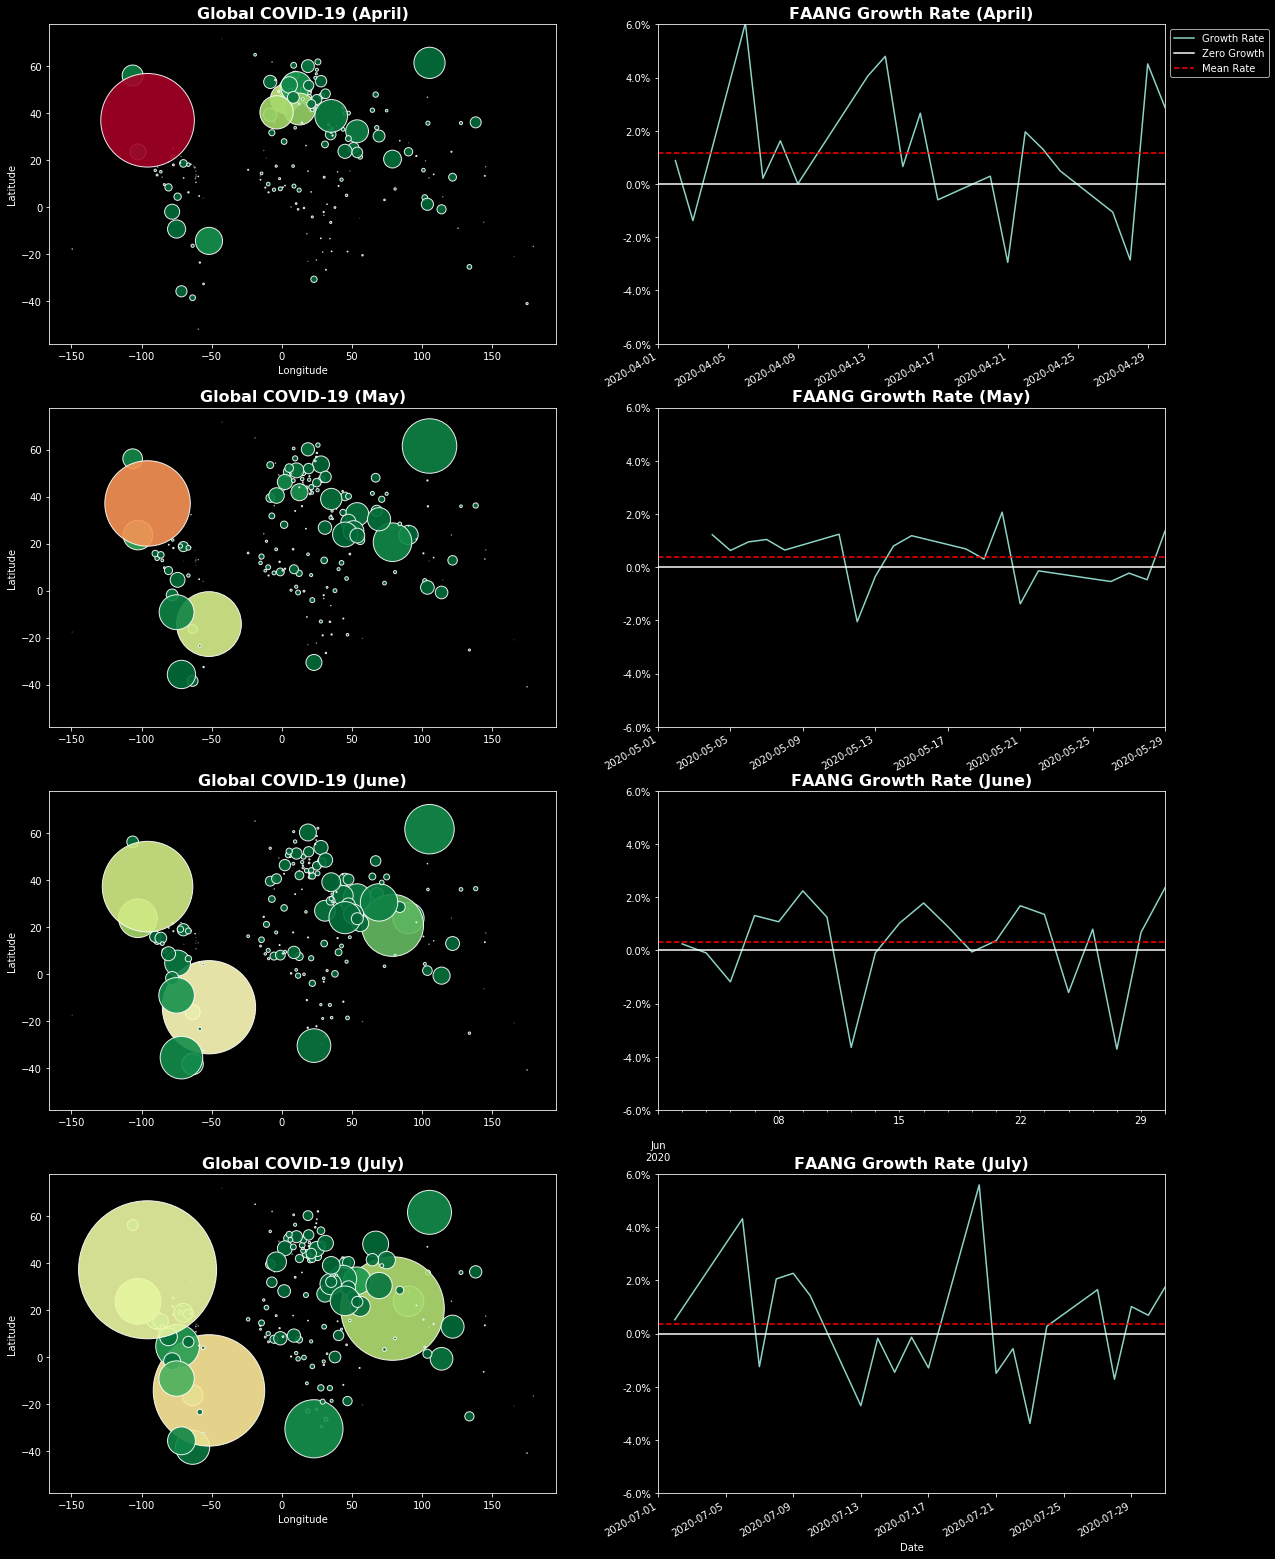

In [110]:
fig, ax = plt.subplots(ncols = 2,nrows = 4)
plt.subplots_adjust(bottom = .7)

#APRIL

covid_april.plot.scatter(ax = ax[0,0],figsize=(20,30), y='Latitude',x='Longitude',s=covid_april['New Cases'] * .01,
                         color=reversed_cmap(n(covid_april['Deaths'].values * 2500)),
                        edgecolors = 'white',alpha = .9)
ax[0,0].set_title("Global COVID-19 (April)", fontsize = 16, fontweight = 'bold')

f4_piv.plot.line(ax = ax[0,1])

ax[0,1].axhline(0, color = 'white')
april_mean = f4_piv['4'].mean()
ax[0,1].axhline(april_mean, color = 'red',linestyle = 'dashed')

ax[0,1].legend(bbox_to_anchor = (1, 1), labels = ['Growth Rate','Zero Growth','Mean Rate'])
ax[0,1].set_title("FAANG Growth Rate (April)", fontsize = 16, fontweight = 'bold')
ax[0,1].set_ylim(-.06, .06)
ax[0,1].set_xlabel(xlabel = '')
ax[0,1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


#MAY

covid_may.plot.scatter(ax = ax[1,0], y='Latitude',x='Longitude',s=covid_may['New Cases'] * .01,
                         color=reversed_cmap(n(covid_may['Deaths'].values * 2500)),
                        edgecolors = 'white',alpha = .9)
ax[1,0].set_title("Global COVID-19 (May)", fontsize = 16, fontweight = 'bold')
ax[1,0].set_xlabel(xlabel = '')

f5_piv.plot.line(ax = ax[1,1])

ax[1,1].axhline(0, color = 'white')
may_mean = f5_piv['5'].mean()
ax[1,1].axhline(may_mean, color = 'red',linestyle = 'dashed')
ax[1,1].legend().remove()
ax[1,1].set_title("FAANG Growth Rate (May)", fontsize = 16, fontweight = 'bold')
ax[1,1].set_ylim(-.06, .06)
ax[1,1].set_xlabel(xlabel = '')
ax[1,1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

#JUNE

covid_june.plot.scatter(ax = ax[2,0], y='Latitude',x='Longitude',s=covid_june['New Cases'] * .01,
                         color=reversed_cmap(n(covid_june['Deaths'].values * 2500)),
                        edgecolors = 'white',alpha = .9)
ax[2,0].set_title("Global COVID-19 (June)", fontsize = 16, fontweight = 'bold')
ax[2,0].set_xlabel(xlabel = '')

f6_piv.plot.line(ax = ax[2,1])
ax[2,1].set_title("FAANG Growth Rate (June)", fontsize = 16, fontweight = 'bold')
ax[2,1].axhline(0, color = 'white')
june_mean = f6_piv['6'].mean()
ax[2,1].axhline(june_mean, color = 'red',linestyle = 'dashed')

ax[2,1].legend().remove()
ax[2,1].set_ylim(-.06, .06)
ax[2,1].set_xlabel(xlabel = '')
ax[2,1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))



#JULY

covid_july.plot.scatter(ax = ax[3,0], y='Latitude',x='Longitude',s=covid_july['New Cases'] * .01,
                         color=reversed_cmap(n(covid_july['Deaths'].values * 2500)),
                        edgecolors = 'white',alpha = .9)
ax[3,0].set_title("Global COVID-19 (July)", fontsize = 16, fontweight = 'bold')

f7_piv.plot.line(ax = ax[3,1])
ax[3,1].axhline(0, color = 'white')
july_mean = f7_piv['7'].mean()
ax[3,1].axhline(july_mean, color = 'red',linestyle = 'dashed')
ax[3,1].legend().remove()
ax[3,1].set_title("FAANG Growth Rate (July)", fontsize = 16, fontweight = 'bold')
ax[3,1].set_ylim(-.06, .06)
ax[3,1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.savefig('Covid_stocks.png')

### Graphs below show neew cases per country as represented by the scatter plots above

In [163]:
fig_a = go.Figure(data=go.Choropleth(
    locations = covid_april['countryterritoryCode'],
    z = covid_april['New Cases'],
    text = covid_april['Country'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'New Cases',))
fig_a.update_layout(
    title_text='April COVID Cases',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: Kaggle',
        showarrow = False
    )]
)

In [164]:
fig_m = go.Figure(data=go.Choropleth(
    locations = covid_may['countryterritoryCode'],
    z = covid_may['New Cases'],
    text = covid_may['Country'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'New Cases',))
fig_m.update_layout(
    title_text='May COVID Cases',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: Kaggle',
        showarrow = False
    )]
)

In [165]:
fig_june = go.Figure(data=go.Choropleth(
    locations = covid_june['countryterritoryCode'],
    z = covid_june['New Cases'],
    text = covid_june['Country'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'New Cases',))
fig_june.update_layout(
    title_text='June COVID Cases',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: Kaggle',
        showarrow = False
    )]
)

In [166]:
fig_july = go.Figure(data=go.Choropleth(
    locations = covid_july['countryterritoryCode'],
    z = covid_july['New Cases'],
    text = covid_july['Country'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'New Cases',
))
fig_july.update_layout(
    title_text='July COVID Cases',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: Kaggle',
        showarrow = False
    )]
)

# Analysis
The column one scatter plots visualize the relationship between the number of new COVID-19 cases (size of bubble) and the number of COVID-19 related deaths (color of bubble) per country from April to July. Smaller and green bubbles are indicative of fewer new cases and deaths, whereas larger and red bubbles are the opposite. The general trends by continent are as follows:

-In North America the United States experiences a decrease in monthly deaths and cases from April to June. However, in July, the resurgence of new cases in America reaches new heights. Canada sees a general of decreasing cases with consistently low fatalities. In Mexico the graphs indicate an increase in both cases and deaths.
<br>
-In South America, Brazil is the serious case of the trend, which is increasing new cases and deaths. Brazil’s situation can be considered a result of the lack of lockdown measures.
<br>
-Europe undergoes a decrease in both new cases and deaths during the summer months. Likely a result of strict lockdown measures utilized during the first wave of COVID. Russia is an exception and experiences higher levels of new cases.
<br>
-Africa does see an increase in cases, especially in South Africa. However, there does not appear to be a substantial increase in COVID-19 related deaths.
<br>
-Both Australia and New Zealand retain both low case growth and fatalities.
<br>
-In Asia there is a contrast between East Asia and India/Middle East. East Asian countries have near miniscule new cases and deaths, with exception to Japan, which experienced case growth in July. However, the Middle East and India are the opposite, experiencing both an increase in new cases and deaths throughout the summer. India is the most notable as it appears to have the largest case and death increase in Asia. There is also an increase in new cases in South East Asia countries: Indonesia and the Philippines.

Column two line charts depict the aggregated growth rate of FAANG stocks in the aforementioned time period. The dashed, red line represents the mean growth rate for that month. In April the FAANG growth rate was larger, slightly higher than 1%, however from May-July that rate was depressed and near zero growth (~.3%)

What is surprising is the FAANG growth rate was higher when the United States’ death count was its worst and started to decrease as deaths decreased, but cases rose. Potentially due to stock speculation. 

Given that East Asian and European cases are low/decreasing there does not seem to be much of a visual relationship between these continents and the FAANG growth rate. In fact when the new cases were at the highest level in the United States in July, the FAANG growth rate had slightly increased from .32% in June to .35% in July.

Monthly FAANG growth rates are below:

April FAANG Rate: 1.18%
<br>
May FAANG Rate: 0.37%
<br>
June FAANG Rate: 0.32%
<br>
July FAANG Rate: 0.35%

In [23]:
#print("April FAANG Rate: {:.2%}".format(april_mean))
#print("May FAANG Rate: {:.2%}".format(may_mean))
#print("June FAANG Rate: {:.2%}".format(june_mean))
#print("July FAANG Rate: {:.2%}".format(july_mean))

# U.S. COVID vs. USD/EM, USD/AFE

In [24]:
#us_counties

In [25]:
#usd_em_econ

In [26]:
usd_afe = usd_adv_econ[usd_adv_econ['DATE'].dt.date.astype(str) >= '2020-01-21']
#usd_afe

In [27]:
usd_em = usd_em_econ[usd_em_econ['DATE'].dt.date.astype(str) >= '2020-01-21']
#usd_em

In [28]:
us_covid = us_counties[us_counties['date'].dt.date.astype(str) <= '2020-11-06']
us_covid = us_covid.drop(columns = ['fips'], axis = 1)
us_covid = us_covid.set_index(['date'])
us_covid = us_covid.rename(columns={"date":"Date","state":"State","cases": "Cases","deaths":"Deaths"})
#us_covid = us_covid.iloc[::,:]

#us_covid = us_covid.groupby(['Date','State'])['Cases','Deaths'].sum()
us_covid = us_covid.groupby([(us_covid.index.month)]).sum()
#piv = us_covid.pivot_table(index = 'date',columns = 'State', values = 'Cases', aggfunc = 'sum')
#piv.pct_change()

In [29]:
#us_covid

In [30]:
#usd_afe

In [31]:
usd_em
usd = usd_em.merge(usd_afe, on = 'DATE', how = 'left')
usd['DTWEXAFEGS'] = pd.to_numeric(usd['DTWEXAFEGS'],errors = 'coerce')
usd['DTWEXEMEGS'] = pd.to_numeric(usd['DTWEXEMEGS'],errors = 'coerce')
numeric = usd.copy()
usd.dtypes
numeric['EM_Rolling'] = numeric.iloc[:,1].rolling(window=5).mean()
numeric['AFE_Rolling'] = numeric.iloc[:,2].rolling(window=5).mean()
#numeric

In [32]:
usd_pct = usd.copy()
usd_pct['DTWEXEMEGS'] = pd.to_numeric(usd_pct['DTWEXEMEGS'],errors = 'coerce').pct_change()
usd_pct['DTWEXAFEGS'] = pd.to_numeric(usd_pct['DTWEXAFEGS'],errors = 'coerce').pct_change()

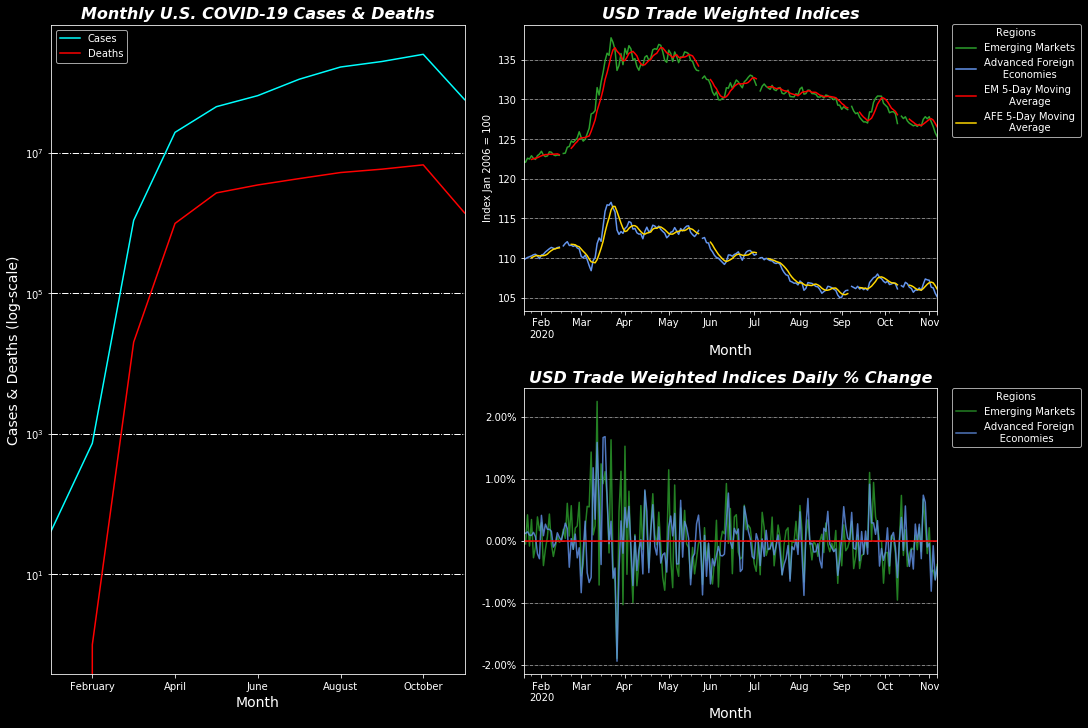

In [33]:
plt.style.use('dark_background')
fig2 = plt.figure(constrained_layout = True, figsize = (15,10))
gs = fig2.add_gridspec(2,2)
covid = fig2.add_subplot(gs[:,0])

us_covid[['Cases','Deaths']].plot(ax = covid, color = ['cyan','red'])

covid.set_yscale('log')
covid.set_title('Monthly U.S. COVID-19 Cases & Deaths', fontsize = 16, fontweight = 'bold', fontstyle = 'oblique')
covid.set_xlabel('Month', fontsize = 14)
covid.set_ylabel('Cases & Deaths (log-scale)', fontsize = 14)
covid.set_xticklabels(['','February', 'April','June','August','October'], fontsize = 10, rotation = 'horizontal')
covid.grid(color = 'white', linestyle = '-.', linewidth = 1, axis = 'y')

### top right

num = fig2.add_subplot(gs[0,1:])
numeric.plot(ax = num, color = 'tab:green', x = 'DATE', y ='DTWEXEMEGS')
numeric.plot(ax = num, color = 'cornflowerblue', x = 'DATE', y = 'DTWEXAFEGS')
numeric.plot(ax = num, color = 'red', x='DATE', y= 'EM_Rolling')
numeric.plot(ax = num, color = 'gold', x='DATE', y= 'AFE_Rolling')

num.legend(title = 'Regions', labels = ['Emerging Markets', """Advanced Foreign 
      Economies""", """EM 5-Day Moving
        Average""", """AFE 5-Day Moving
        Average"""], loc='upper right',bbox_to_anchor=(1.36, 1.02))
num.set_title('USD Trade Weighted Indices', fontsize = 16, fontweight = 'bold', fontstyle = 'oblique')
num.set_xlabel('Month', fontsize = 14)
num.grid(color = 'white', linestyle = '-.', linewidth = .5, axis = 'y')
num.set_ylabel('Index Jan 2006 = 100', fontsize = 10)


### bottom right

pct = fig2.add_subplot(gs[1:,1:])
usd_pct.plot(ax = pct, color = 'tab:green',alpha = .8, x = 'DATE', y ='DTWEXEMEGS')
usd_pct.plot(ax = pct, color = 'cornflowerblue', alpha = .8, x = 'DATE', y = 'DTWEXAFEGS')

pct.set_xlabel('Month', fontsize = 14)
pct.axhline(0, color = 'red')
pct.set_title('USD Trade Weighted Indices Daily % Change', fontsize = 16, fontweight = 'bold', fontstyle = 'oblique')
pct.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
pct.legend(title = 'Regions', labels = ['Emerging Markets', """Advanced Foreign 
     Economies"""],loc='upper right',bbox_to_anchor=(1.36, 1.02))
pct.grid(color = 'white', linestyle = '-.', linewidth = .5, axis = 'y')

# Analysis

The first graph depicts daily U.S. COVID cases from 1/21 - 11/6 on the logarithmic scale. It is visible that from February to March cases and deaths more than doubled, experiencing the greatest growth of any month. From March to April the growth slows however both cases and deaths still nearly double. In the months after the curve begins to flatten and in October begins to decrease. 

The graph in the top right corner shows a Trade Weighted USD compared to Advanced Foreign Economies (AFE) and Emerging Markets (EM) for goods & services. There is an initial appreciation of the dollar against both regions before depreciation beginning in late March. This depreciation trend continues through the end of the graphed time period. The dollar is weaker in November than in March.

The lower right corner graph visualizes daily growth rates in both Trade Weighted USD vs. AFE and EM for goods & services. Heading into March volatility begins to increase and growth rates will break +2% and nearly break -2%. The USD had both substantial increases and decreases relative to both regions, appreciating 2% against EMs and depreciating nearly -2% to AFEs. From the end of March onwards volatility decreased, and with exception to a few days, remained between -1% and 1%. 

What’s interesting is that in March, when the U.S. COVID cases and deaths growth substantially increases there is both an increase in volatility and an appreciation of the USD. However, when COVID cases begin to flatten circa beginning of April both Trade Weighted Indices also flatten until late-May, early-June before a depreciation trend. Volatility also decreases from the beginning of April, remaining in the -1% to 1% bounds throughout the rest of the time period. However, after April, as U.S. case and death curves continue to flatten, the depreciation trend continues. Thus, the depreciation of the USD is likely not solely due to COVID but relates to other factors in the economy at large.

However, during the period the USD actually appreciated to EMs by 3.1615 from 122.1471 to 125.3086 while the USD depreciated to AFEs by 4.6691 from 109.7980 to 105.1289. 

# Does USD or COVID Cases Best Explain FAANG Data

In [34]:
usd_rmb.dtypes
usd_rmb.DEXCHUS = pd.to_numeric(usd_rmb.DEXCHUS, errors='coerce')

usd_rmb = usd_rmb.rename(columns={"DATE": "Date"})
usd_rmb = usd_rmb.set_index('Date')
usd_rmb = usd_rmb.loc['2020-01-21':'2020-07-31']

usd_rmb = usd_rmb.reset_index()
#usd_rmb = usd_rmb.drop(columns = ['RMB_Growth_Rate'], axis = 1)
usd_rmb['RMB_GR'] = usd_rmb['DEXCHUS'].pct_change()
usd_rmb = usd_rmb.iloc[1:]
#usd_rmb

In [35]:
#faangs = faangs.drop(columns = ['total', 'Month'], axis = 1)
faangs1 = faangs
faangs1['Total'] = (faangs['Close_FB'] + faangs['Close_Apple'] + faangs['Close_Amazon'] + 
                   faangs['Close_Google'] + faangs['Close_Netflix'])
faangs1['Date'] =  pd.to_datetime(faangs1['Date'])
faangs1 = faangs1.set_index('Date')
faangs1 = faangs1.loc['2020-01-21':'2020-07-31']
faangs1 = faangs1.reset_index()
faangs1 = faangs1.groupby('Date', as_index = False)['Total'].sum()
faangs1['Faang_GR'] = faangs1['Total'].pct_change()
faangs1 = faangs1.iloc[1:]
#faangs1

In [36]:
us_covid2 = us_counties.rename(columns={"date":"Date","state":"State","cases": "Cases","deaths":"Deaths"})
us_covid2 = us_covid2.set_index('Date')
us_covid2 = us_covid2.loc['2020-01-21':'2020-07-31']
us_covid2 = us_covid2.reset_index()
us_covid2 = us_covid2.groupby('Date', as_index = False)['Cases'].sum()
us_covid2['Case_GR'] = us_covid2['Cases'].pct_change()
us_covid2 = us_covid2.iloc[1:]
#us_covid2

In [37]:
covid_faang = us_covid2.merge(faangs1, on = 'Date', how = 'left')
covid_faang = covid_faang.dropna()
covid_faang = usd_rmb.merge(covid_faang, on = 'Date', how = 'left')
covid_faang = covid_faang.drop(columns = ['Total','Cases','DEXCHUS'])
covid_faang = covid_faang.dropna()
covid_faang = covid_faang.drop(2)
#covid_faang

In [38]:
reg = linreg().fit(X = covid_faang[['Case_GR']], y = covid_faang['Faang_GR'])
covid_faang['yhat1'] = reg.predict(covid_faang[['Case_GR']])

In [39]:
reg2 = linreg().fit(X = covid_faang[['RMB_GR']], y = covid_faang['Faang_GR'])
covid_faang['yhat2'] = reg.predict(covid_faang[['RMB_GR']])

Text(0.5, 0, 'U.S. COVID Case Growth Rate')

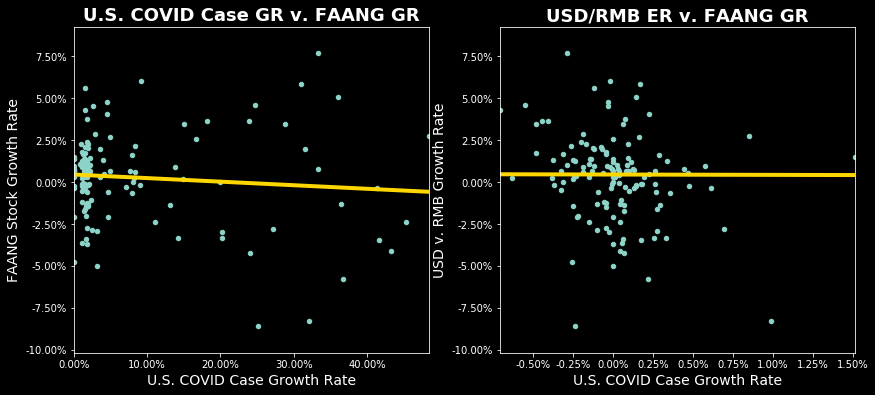

In [40]:
plt.style.use('dark_background')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

#COVID, FAANG

covid_faang.plot.scatter(ax = ax[0], x = 'Case_GR',y='Faang_GR')
covid_faang.sort_values('Case_GR').set_index('Case_GR')['yhat1'].plot(ax = ax[0], color = 'gold', lw = 4)

vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.2%}'.format(x) for x in vals])

valsx = ax[0].get_xticks()
ax[0].set_xticklabels(['{:,.2%}'.format(y) for y in valsx])

ax[0].set_title('U.S. COVID Case GR v. FAANG GR', fontsize = 18, fontweight = 'bold')
ax[0].set_ylabel('FAANG Stock Growth Rate', fontsize = 14)
ax[0].set_xlabel('U.S. COVID Case Growth Rate', fontsize = 14)


#RMB, FAANG

covid_faang.plot.scatter(ax = ax[1], x = 'RMB_GR', y = 'Faang_GR')
covid_faang.sort_values('RMB_GR').set_index('RMB_GR')['yhat2'].plot(ax = ax[1], color = 'gold',lw = 4)

vals1 = ax[1].get_yticks()
ax[1].set_yticklabels(['{:,.2%}'.format(x) for x in vals1])

valsx1 = ax[1].get_xticks()
ax[1].set_xticklabels(['{:,.2%}'.format(y) for y in valsx1])

ax[1].set_title('USD/RMB ER v. FAANG GR', fontsize = 18, fontweight = 'bold')
ax[1].set_ylabel('USD v. RMB Growth Rate', fontsize = 14)
ax[1].set_xlabel('U.S. COVID Case Growth Rate', fontsize = 14)

In [41]:
reg.score(X = covid_faang[['Case_GR']], y = covid_faang['Faang_GR'])

0.009477868000497658

In [42]:
reg2.score(X = covid_faang[['RMB_GR']], y = covid_faang['Faang_GR'])

0.048063144472155546

# Analysis

The graphs depict the relationships between USD v. RMB and FAANG stock growth rates with U.S. COVID case percent change from 1/21 - 9/31. It is visible that increases in COVID growth rates caused a decrease in FAANG growth rate, while a slight increase in USD v. RMB growth rate. While it is expected that increased COVID cases is correlated worse stock performance, it is surprising that increases in COVID growth had a relationship with USD appreciation.

The analysis that US COVID Case GR and FAANGs are negatively correlated. However, there is a slight positive correlation between the the USD v. RMB GR and FAANG GR.

In [43]:
import pandas as pd             
import matplotlib.pyplot as plt  
import datetime as dt           
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import math
import os                       
import requests, io              
import zipfile as zf             
import shutil                   
import statsmodels.formula.api as smf
%matplotlib inline

In [44]:
state_level = pd.DataFrame(us_counties.groupby(['date','state'])['deaths'].sum())
state_level = state_level.reset_index('state')
state_level = state_level.reset_index('date')
state_level = state_level.sort_values(by=['date','state'])
state_level = state_level.set_index('date')
#state_level

In [45]:
state = pd.Series(state_level['state'].unique())
#plt.style.available

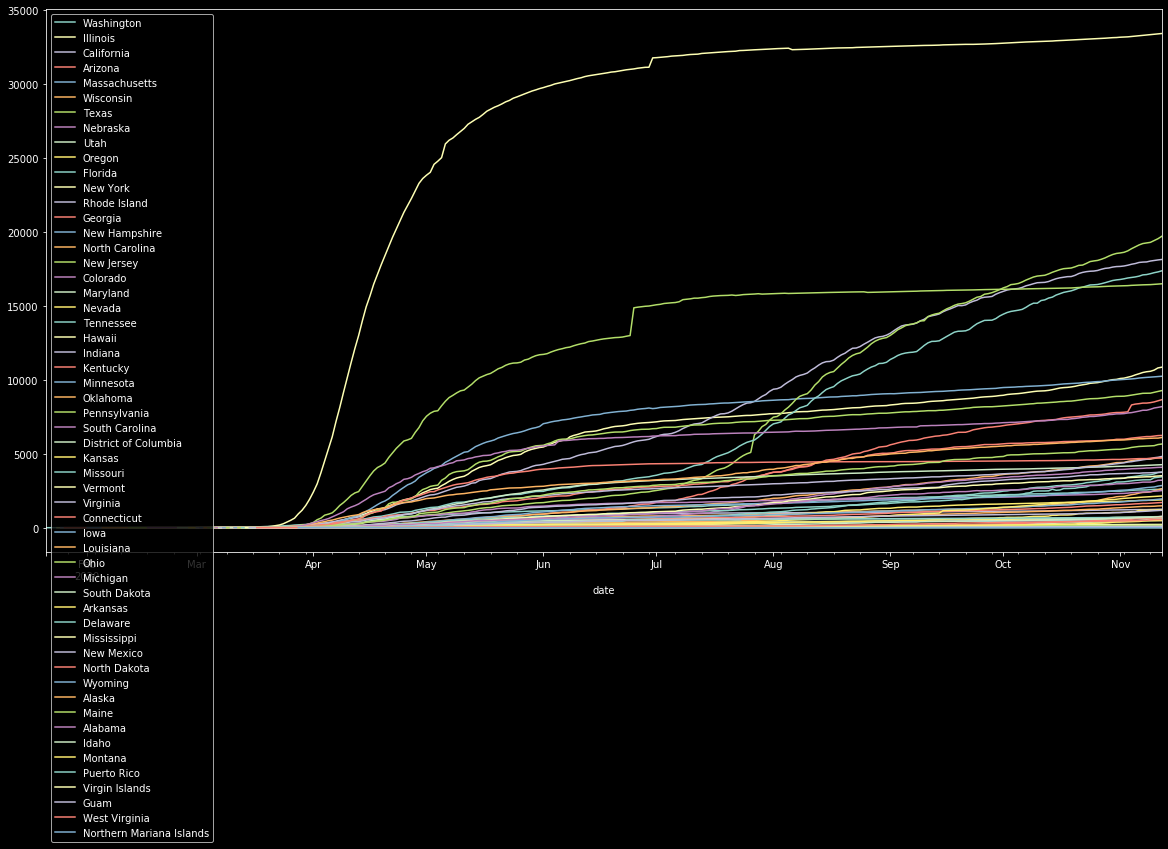

In [46]:
plt.style.use('dark_background')
fig,ax = plt.subplots()
for i in state:
    state_level.loc[state_level['state'] == i,:]['deaths'].plot(ax =ax,figsize = (20,10),label=i)
    ax.legend(loc='best')
#ax.legend()
#state_level['deaths'].mean().plot(ax =ax,figsize = (10,5))
#state_level['death'].plot(ax =ax,figsize = (10,5))
#plt.plot(state_level['date'],state_level['deaths'],label=state_level['state'])
#plot(state_level['death'], label=state_level['state'])

In [178]:
#state_level.iloc[:,1]

In [177]:
state_level_pivot = pd.pivot_table(state_level,index=['date'],columns=['state'],
               values=['deaths'],fill_value=np.nan)
state_level_pivot = state_level_pivot.dropna()
#state_level_pivot

In [176]:
for i in range(0,55):
    state_level_pivot['death_'+str(i)] = state_level_pivot.iloc[:,i].rolling(window=7).mean()

#state_level_pivot

In [175]:
import datetime
df2_2 = state_level.reset_index('date')
df2_2['Date'] = pd.to_datetime(df2_2['date'])
df2_2['Date'] = df2_2['Date'].dt.strftime('%d.%m.%Y')
df2_2['month'] = pd.DatetimeIndex(df2_2['Date']).month
df2_2['day'] = pd.DatetimeIndex(df2_2['Date']).day
df2_2['dayofyear'] = pd.DatetimeIndex(df2_2['Date']).dayofyear
df2_2['weekofyear'] = pd.DatetimeIndex(df2_2['Date']).weekofyear
df2_2['weekday'] = pd.DatetimeIndex(df2_2['Date']).weekday
df2_2['quarter'] = pd.DatetimeIndex(df2_2['Date']).quarter
df2_2['is_month_start'] = pd.DatetimeIndex(df2_2['Date']).is_month_start
df2_2['is_month_end'] = pd.DatetimeIndex(df2_2['Date']).is_month_end
df2_2 = df2_2.drop(['Date'], axis = 1)
df2_2 = df2_2.drop(['date'], axis = 1)
df2_2= pd.get_dummies(df2_2, columns=['month'], drop_first=True, prefix='month')
df2_2 = pd.get_dummies(df2_2, columns=['weekday'], drop_first=True, prefix='wday')
df2_2 = pd.get_dummies(df2_2, columns=['quarter'], drop_first=True, prefix='qrtr')
df2_2= pd.get_dummies(df2_2, columns=['is_month_start'], drop_first=True, prefix='m_start')
df2_2 = pd.get_dummies(df2_2, columns=['is_month_end'], drop_first=True, prefix='m_end')
df2_2= pd.get_dummies(df2_2, columns=['state'], drop_first=True, prefix='state')
#df2_2
#df2_2

In [51]:
from sklearn.model_selection import train_test_split

X = df2_2.drop(columns=["deaths"]).values
y = df2_2.deaths.values
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, shuffle=False, test_size=0.5, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, shuffle=False, test_size=0.5, random_state = 0)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

y_predicted    = model_1.predict(X_val)
MAE_sklearn = mean_absolute_error(y_val, y_predicted)
yy = model_1.predict(X_train)
MAE_sklearn_train = mean_absolute_error(y_train, yy)

In [53]:
MAE_sklearn

1846.8099381232194

In [54]:
us_level = pd.DataFrame(state_level.groupby('date')['deaths'].sum())
#us_level

In [55]:
path_netflix = '/Users/jarrodhoran/Downloads/Netflix.csv'
netflix = pd.read_csv(path_netflix).tail(365)
netflix['Date'] = pd.to_datetime(netflix['Date'])
netflix = netflix[netflix['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
#pd.set_option('display.max_rows', None)
netflix = netflix.set_index('Date')
#netflix

In [56]:
netflix_sub = netflix.iloc[:,3:4]
#netflix_sub

In [57]:
path_amazon = '/Users/jarrodhoran/Downloads/Amazon.csv'
amazon = pd.read_csv(path_amazon).tail(365)
amazon['Date'] = pd.to_datetime(amazon['Date'])
amazon = amazon[amazon['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
amazon = amazon.set_index('Date')

In [58]:
amazon_sub = amazon.iloc[:,3:4]
#amazon_sub

In [174]:
amazon_sub1 = amazon_sub.reset_index('Date')
#amazon_sub1

In [60]:
path_google = '/Users/jarrodhoran/Downloads/Google.csv'
google = pd.read_csv(path_google).tail(365)
google['Date'] = pd.to_datetime(google['Date'])
google = google[google['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
google = google.set_index('Date')
#google

In [61]:
google_sub = google.iloc[:,3:4]
#google_sub

In [173]:
google_sub1 = google_sub.reset_index('Date')
#google_sub1

In [63]:
path_apple = '/Users/jarrodhoran/Downloads/Apple.csv'
apple = pd.read_csv(path_apple).tail(365)
apple['Date'] = pd.to_datetime(apple['Date'])
apple = apple[apple['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
apple = apple.set_index('Date')
#apple

In [172]:
apple_sub = apple.iloc[:,3:4]
apple_sub1 = apple_sub.reset_index('Date')
#apple_sub1

In [65]:
path_facebook = '/Users/jarrodhoran/Downloads/Facebook.csv'
facebook = pd.read_csv(path_facebook).tail(365)
facebook = facebook
facebook['Date'] = pd.to_datetime(facebook['Date'])
facebook = facebook[facebook['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
facebook = facebook.set_index('Date')
#facebook

In [171]:
facebook_sub = facebook.iloc[:,3:4]
facebook_sub1 = facebook_sub.reset_index('Date')
#facebook_sub1

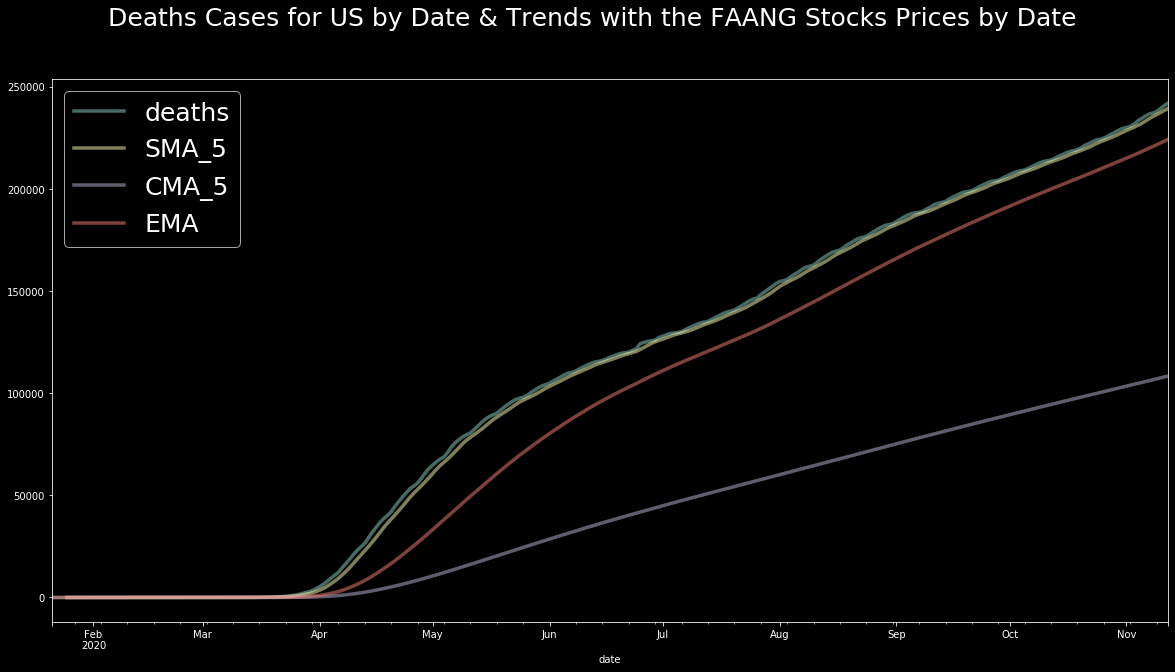

In [67]:
fig, ax1 = plt.subplots()
fig.suptitle('Deaths Cases for US by Date & Trends with the FAANG Stocks Prices by Date',fontsize=25)
us_level['deaths'].plot(ax =ax1,figsize = (20,10),lw=3.5,alpha = 0.5)
#us_level['SMA_3'] = us_level.iloc[:,0].rolling(window=3).mean()
#us_level['SMA_4'] = us_level.iloc[:,0].rolling(window=4).mean()
us_level['SMA_5'] = us_level.iloc[:,0].rolling(window=5).mean()
us_level['CMA_5'] = us_level.iloc[:,0].expanding(min_periods=5).mean()
us_level['EMA'] = us_level.iloc[:,0].ewm(span=40,adjust=False).mean()
#us_level['SMA_3'].plot(ax=ax,lw=4)
#us_level['SMA_4'].plot(ax=ax)
us_level['SMA_5'].plot(ax=ax1,alpha = 0.5,lw=3.5)
us_level['CMA_5'].plot(ax=ax1,alpha = 0.5,lw=3.5)
us_level['EMA'].plot(ax=ax1,alpha = 0.5,lw=3.5)
ax1.legend(fontsize=25)
plt.savefig('COVID19.png')

In [170]:
#amazon_sub1

In [169]:
#us_level

In [69]:
netflix_sub1 = netflix_sub.reset_index('Date')

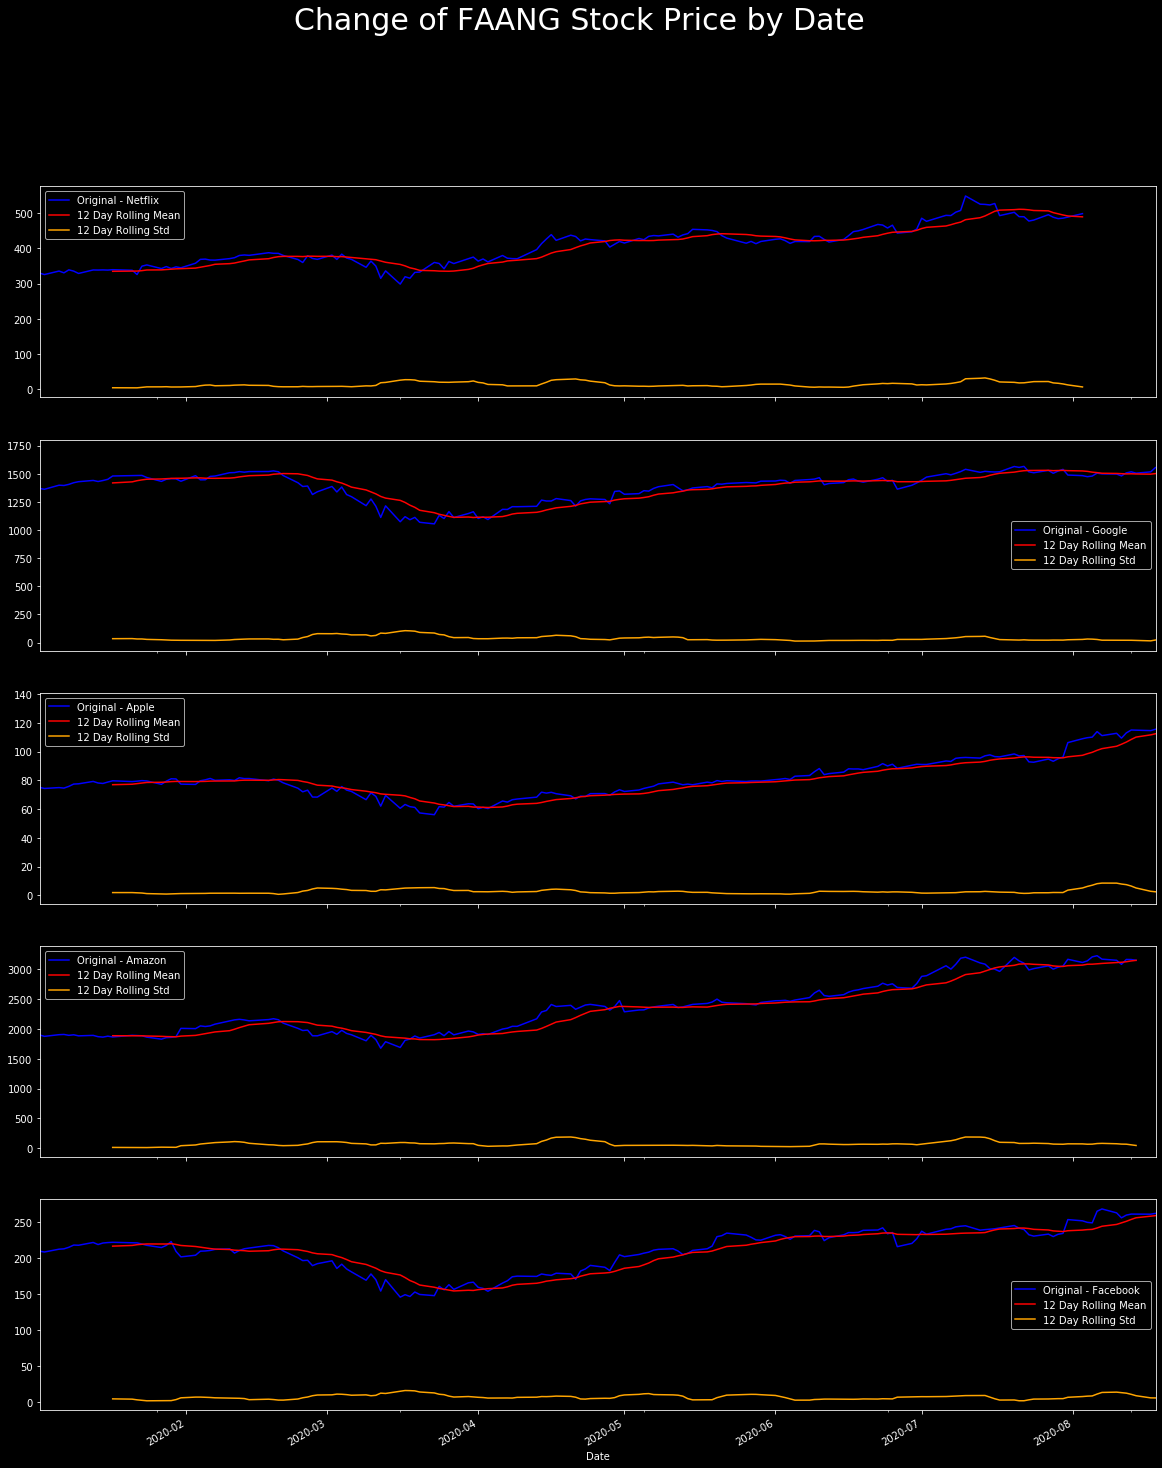

In [70]:
fig,ax = plt.subplots(5,figsize=(20,25),sharex=True)
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries,i,name):
    
    #Determing rolling statistics
    timeseries['rolmean'] = timeseries.iloc[:,1:2].rolling(window=12).mean()
    timeseries['rolstd']= timeseries.iloc[:,1:2].rolling(window=12).std()

    #Plot rolling statistics:
    plt.style.use('dark_background')
    timeseries.plot(x='Date',y='Close',color='blue',label='Original'+' - '+str(name).title(),ax=ax[i])
    timeseries.plot(x='Date',y='rolmean',color='red', label='12 Day Rolling Mean',ax=ax[i])
    timeseries.plot(x='Date',y='rolstd',color='orange', label = '12 Day Rolling Std',ax=ax[i])
    ax[i].legend(loc='best')
    #ax[i].show(block=False)  
    
#ax[0].title('Rolling Mean & Standard Deviation - Netflix') 
fig.suptitle('Change of FAANG Stock Price by Date',fontsize = 30)
test_stationarity(netflix_sub1,0,'netflix')
test_stationarity(google_sub1,1,'google')
test_stationarity(apple_sub1,2,'apple')
test_stationarity(amazon_sub1,3,'amazon')
test_stationarity(facebook_sub1,4,'facebook')
plt.savefig('FAANG1.png')

In [167]:
netflix_sub1 = netflix_sub1.rename(columns={"Close": "Close_Netflix",'rolmean':'rolmean_Netflix',
                                           'rolstd':'rolstd_Netflix'})
amazon_sub1 = amazon_sub1.rename(columns={"Close": "Close_Amazon",'rolmean':'rolmean_Amazon',
                                         "rolstd":'rolstd_Amazon'})
apple_sub1 = apple_sub1.rename(columns={"Close": "Close_Apple",
                                        'rolmean':'rolmean_Apple',
                                       'rolstd':'rolstd_Apple'})
google_sub1 = google_sub1.rename(columns={"Close": "Close_Google",
                                          "rolmean":"rolmean_Google",
                                         "rolstd":'rolstd_Google'})
facebook_sub1 = facebook_sub1.rename(columns={"Close": "Close_Facebook",
                                              'rolmean':'rolmean_FB',
                                              'rolstd':'rolstd_FB'})
#facebook_sub1

In [72]:
stonks = apple_sub1.merge(google_sub1, on = 'Date', how = 'left')
stonks = stonks.merge(amazon_sub1, on = 'Date', how = 'left')
stonks = stonks.merge(netflix_sub1, on ='Date', how = 'left')
stonks = stonks.merge(facebook_sub1, on ='Date', how = 'left')
#stonks = stonks.rename(columns = {"Close_x": "Close_Apple"})

In [73]:
stonks = stonks.set_index('Date')

In [74]:
normalized_stonks = pd.DataFrame(index = stonks.index)

In [75]:
from sklearn import preprocessing
x = stonks.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_stonks = pd.DataFrame(x_scaled)

In [76]:
normalized_stonks = normalized_stonks.rename(columns = {0:"Close_Apple",1:'rolmean_Apple',2:'rolstd_Apple',
                                   3: "Close_Google",4:"rolmean_Google",5:'rolstd_Google',
                                   6: "Close_Amazon",7:'rolmean_Amazon',8:'rolstd_Amazon',
                                   9: "Close_Netflix",10:'rolmean_Netflix',11:'rolstd_Netflix',
                                   12: "Close_Facebook",13:'rolmean_FB',14:'rolstd_FB'})

In [77]:
normalized_stonks=normalized_stonks.dropna()

In [168]:
#normalized_stonks

In [79]:
reg1 = smf.ols('Close_Google ~ Close_Amazon',normalized_stonks).fit()
normalized_stonks['yhat1'] = reg1.predict()

In [80]:
reg2 = smf.ols('Close_Google ~ Close_Apple',normalized_stonks).fit()
normalized_stonks['yhat2'] = reg2.predict()

In [81]:
reg3 = smf.ols('Close_Google ~ Close_Netflix',normalized_stonks).fit()
normalized_stonks['yhat3'] = reg3.predict()

In [82]:
reg4 = smf.ols('Close_Google ~ Close_Facebook',normalized_stonks).fit()
normalized_stonks['yhat4'] = reg4.predict()

Text(0.5, 1.0, 'Netflix & Google')

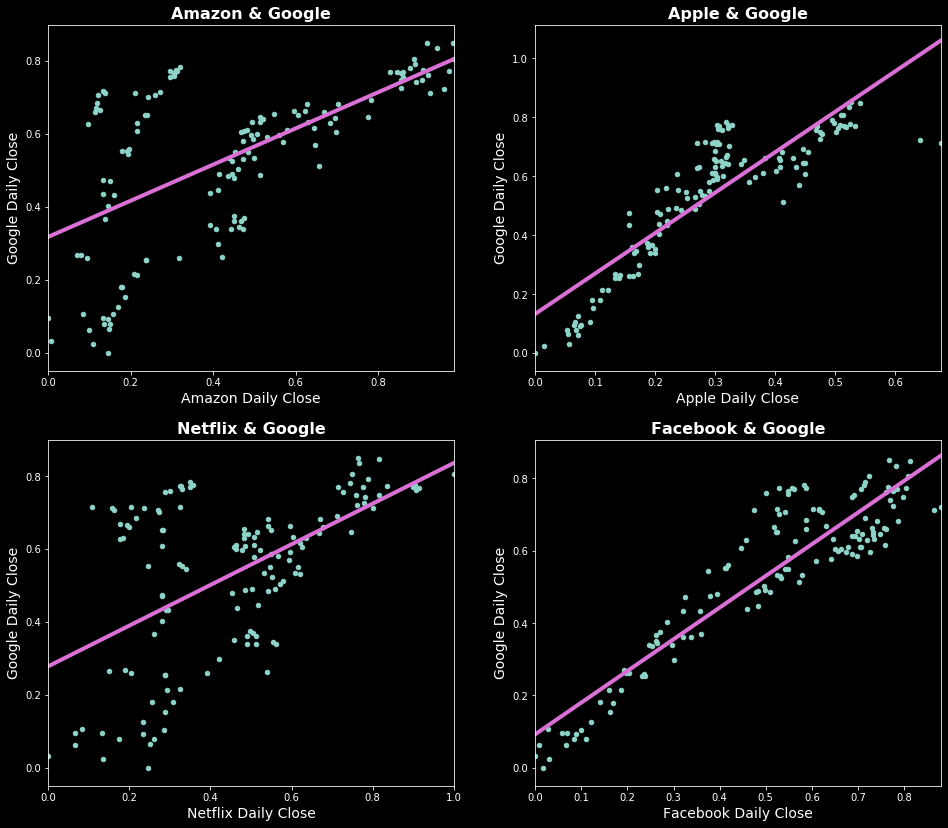

In [83]:
fig,ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16,14))

#top left

normalized_stonks.plot.scatter(ax = ax[0,0], x = 'Close_Amazon', y = 'Close_Google')
normalized_stonks.sort_values('Close_Amazon').set_index('Close_Amazon')['yhat1'].plot(ax = ax[0,0], 
                                                                                      color = 'orchid',lw = 4)


ax[0,0].set_xlabel('Amazon Daily Close', fontsize = 14)
ax[0,0].set_ylabel('Google Daily Close', fontsize = 14)
ax[0,0].set_title('Amazon & Google', fontsize = 16, fontweight = 'bold')


#top right

normalized_stonks.plot.scatter(ax = ax[0,1], x = 'Close_Apple', y = 'Close_Google')
normalized_stonks.sort_values('Close_Apple').set_index('Close_Apple')['yhat2'].plot(ax = ax[0,1], 
                                                                                      color = 'orchid',lw = 4)

ax[0,1].set_xlabel('Apple Daily Close', fontsize = 14)
ax[0,1].set_ylabel('Google Daily Close', fontsize = 14)
ax[0,1].set_title('Apple & Google', fontsize = 16, fontweight = 'bold')

#bottom left

normalized_stonks.plot.scatter(ax = ax[1,1], x = 'Close_Facebook', y = 'Close_Google')
normalized_stonks.sort_values('Close_Facebook').set_index('Close_Facebook')['yhat4'].plot(ax = ax[1,1], 
                                                                                      color = 'orchid',lw = 4)

ax[1,1].set_xlabel('Facebook Daily Close', fontsize = 14)
ax[1,1].set_ylabel('Google Daily Close', fontsize = 14)
ax[1,1].set_title('Facebook & Google', fontsize = 16, fontweight = 'bold')


#bottom right

normalized_stonks.plot.scatter(ax = ax[1,0], x = 'Close_Netflix', y = 'Close_Google')
normalized_stonks.sort_values('Close_Netflix').set_index('Close_Netflix')['yhat3'].plot(ax = ax[1,0], 
                                                                                      color = ['orchid']
                                                                                        ,lw = 4)

ax[1,0].set_xlabel('Netflix Daily Close', fontsize = 14)
ax[1,0].set_ylabel('Google Daily Close', fontsize = 14)
ax[1,0].set_title('Netflix & Google', fontsize = 16, fontweight = 'bold')

In [84]:
print(reg4.summary(),reg2.summary(),reg1.summary(),reg3.summary())

                            OLS Regression Results                            
Dep. Variable:           Close_Google   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     753.0
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           4.47e-57
Time:                        10:10:51   Log-Likelihood:                 141.27
No. Observations:                 137   AIC:                            -278.5
Df Residuals:                     135   BIC:                            -272.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0922      0.018      5.

# Analysis

The charts above use a normalized end-of-day price for the FAANG stocks. The analysis reveals that when predicting the stock price of Google, the end-of-day price for Facebook is the best predictor with an R^2 of .848. The remaining order is Apple (R^2: .762), Amazon (R^2: .361), and Netflix (R^2: .301). Thus, it is likely that the stock prices for Facebook and Google experienced the most similar percent change throughout the time period.
<br>
There is a low P-value, which is indicative that the results are unlikely to occur randomly.